In [787]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# cleaning data

In [788]:
original_df = pd.read_csv("diamonds.csv")

In [789]:
original_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [790]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [791]:
original_df.describe(include="all")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53947.000000,53947.000000,53944,53946,53947,53946.000000,53947.000000,53947.000000,53947.000000,53947.000000,53947
unique,NaN,NaN,8,8,11,NaN,NaN,NaN,NaN,NaN,377
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,2.7
freq,NaN,NaN,21549,11293,13064,NaN,NaN,NaN,NaN,NaN,767
mean,26973.000000,0.797936,NaN,NaN,NaN,61.749271,57.457143,3932.614158,5.731181,5.734549,NaN
std,15573.301823,0.473981,NaN,NaN,NaN,1.432571,2.234418,3989.233934,1.121691,1.142063,NaN
min,0.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,-200.000000,0.000000,0.000000,NaN
25%,13486.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,NaN
50%,26973.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,NaN
75%,40459.500000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,NaN


In [792]:
original_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [793]:
df = original_df.dropna()

In [794]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [795]:
df[df["Unnamed: 0"] != df.index]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [796]:
df=df.drop("Unnamed: 0", axis=1)

In [797]:
"Unnamed: 0" in df.columns

False

In [798]:
df.duplicated().sum()

153

In [799]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [800]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z           object
dtype: object

In [801]:
df = df.drop(df[df["z"] == "g"].index)

In [802]:
df[df["z"] == "g"]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [803]:
df["z"] = df["z"].astype("float64")
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [804]:
df["color"].value_counts()

color
G     11262
E      9774
F      9516
H      8272
D      6754
I      5407
J      2802
87        1
Name: count, dtype: int64

In [805]:
df = df.drop(df[df["color"]=="87"].index)
df = df.drop(df[df["color"]==200].index)
df["color"].value_counts()

color
G    11262
E     9774
F     9516
H     8272
D     6754
I     5407
J     2802
Name: count, dtype: int64

In [806]:
df["cut"].value_counts()

cut
Ideal        21481
Premium      13746
Very Good    12065
Good          4891
Fair          1598
ideal            4
very good        1
premium          1
Name: count, dtype: int64

In [807]:
df["cut"] = df["cut"].str.title()
df["cut"].value_counts()

cut
Ideal        21485
Premium      13747
Very Good    12066
Good          4891
Fair          1598
Name: count, dtype: int64

In [808]:
df["clarity"].value_counts()

clarity
SI1     13029
VS2     12227
SI2      9150
VS1      8152
VVS2     5056
VVS1     3646
IF       1784
I1        740
8           1
7y          1
vs2         1
Name: count, dtype: int64

In [809]:
df = df.drop(df[df["clarity"]=="8"].index)
df = df.drop(df[df["clarity"]=="7y"].index)
df["clarity"] = df["clarity"].str.capitalize()
df["clarity"].value_counts()

clarity
Si1     13029
Vs2     12228
Si2      9150
Vs1      8152
Vvs2     5056
Vvs1     3646
If       1784
I1        740
Name: count, dtype: int64

In [810]:
df = df.drop(df[df["carat"]==200].index)

In [811]:
df= df.drop(df[df["price"]<=0].index)
df.describe(include="all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53784.000000,53784,53784,53784,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,Si1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21485,11261,13029,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797802,NaN,NaN,NaN,61.747977,57.458082,3933.303008,5.731241,5.734685,3.538713
std,0.473427,NaN,NaN,NaN,1.429840,2.233776,3988.435550,1.120780,1.141295,0.705093
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000


# data visualization

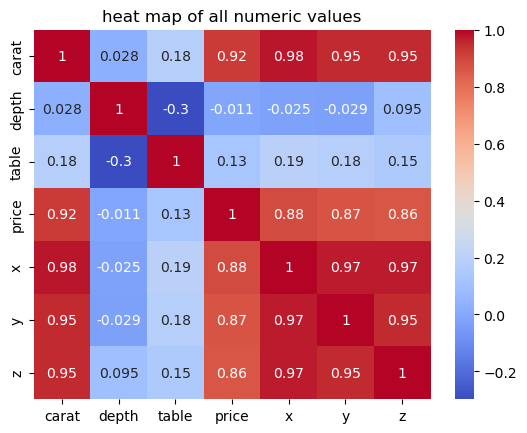

In [812]:
corr = df.select_dtypes(include=["float64","int64"]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("heat map of all numeric values");

**insights**
* strong direct relationship all of x, y and z
* negative relationship between table and depth
* strong direct relationship between carat and all of x, y, z and price

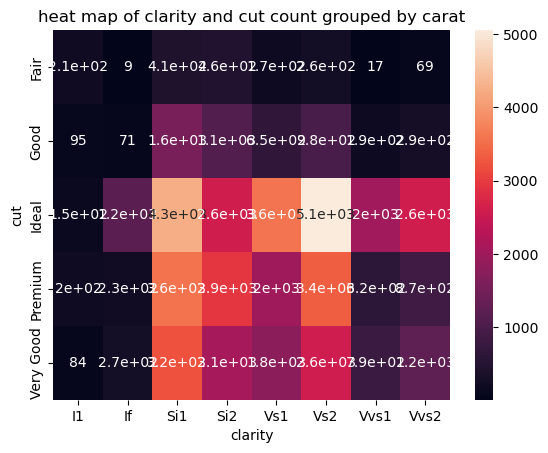

In [813]:
pivot = df.pivot_table(values = "carat", index = "cut", columns = "clarity", aggfunc = "count")
plt.title("heat map of clarity and cut count grouped by carat")
sns.heatmap(pivot, annot = True);

**insight**
* the heights amount of diamond lies in the combination of clarities = {**Si1**, **Si2**, **Vs1**, **Vs2**} and cuts = { **Very Good**, **Premium**, **Ideal** }


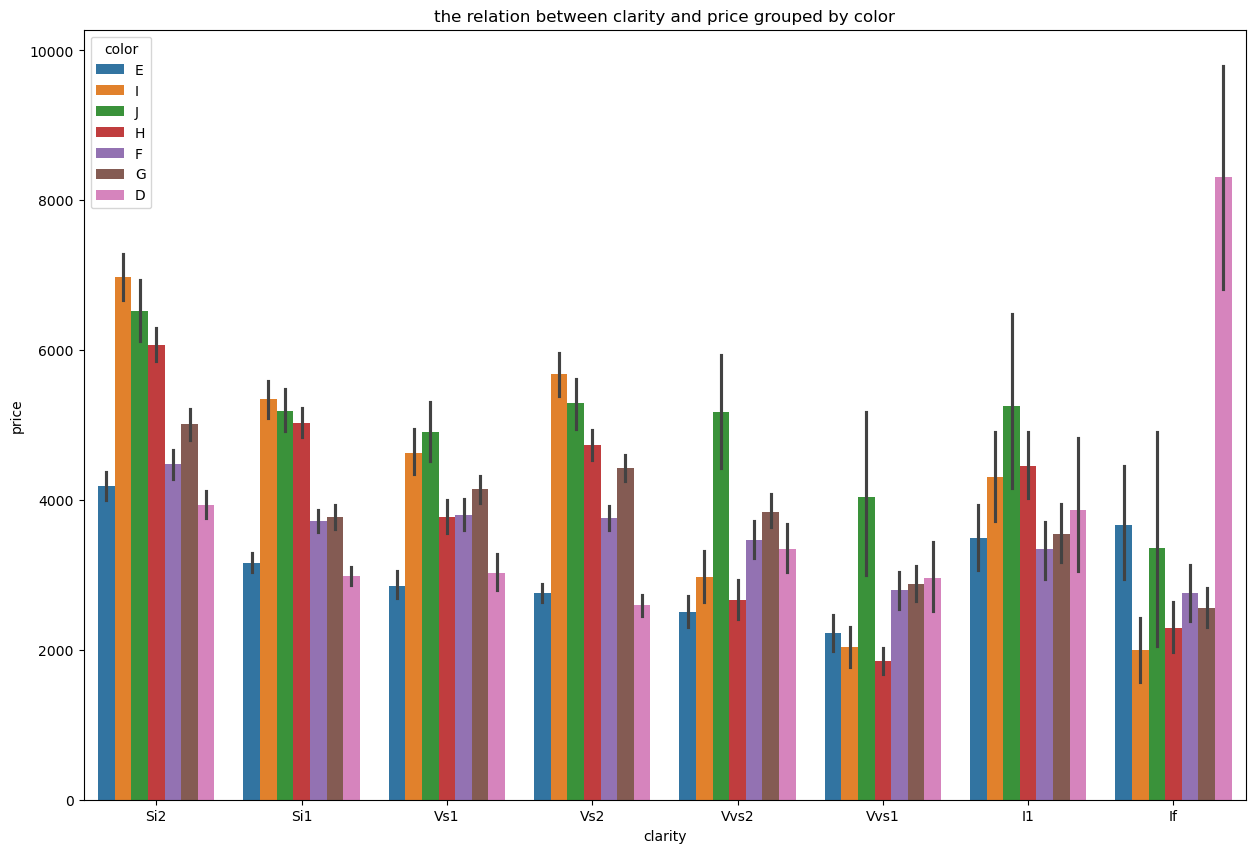

In [814]:
plt.figure(figsize=(15,10))
plt.title("the relation between clarity and price grouped by color")
sns.barplot(data=df, x="clarity", y="price", hue="color");

**insight**
* the heightest average price of a diamond belongs to a diamond of clarity **If** and color **D**
* the heightest average price of a clarity belongs to **Si** while the heightest average price of a color belongs to **J**
* there is no clear relationship between either clarity, price, or color

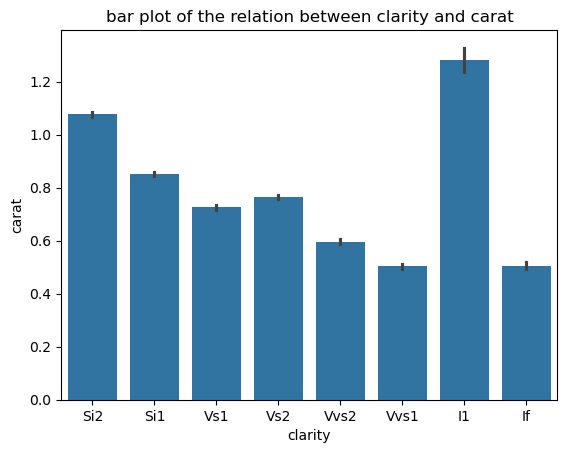

In [815]:
plt.title("bar plot of the relation between clarity and carat")
sns.barplot(data=df, x="clarity", y="carat");

**insight**
* the clarity of **I1** has the heighest average carat
* the groupe of clarity **Si1** and **Si2** is the second heighest followed by the group of **Vs1** and **Vs2**
* there is no clear connection between the clarity and the price

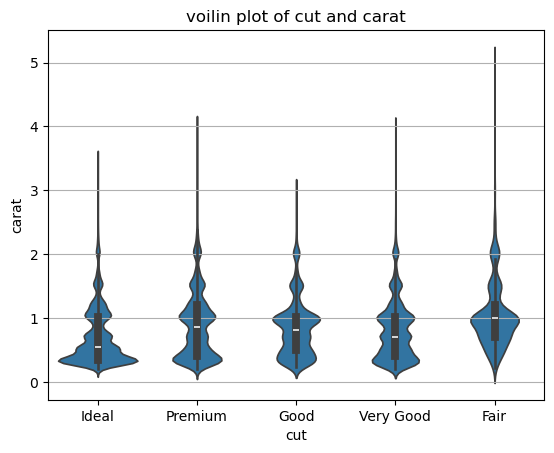

In [816]:
plt.grid(True)
plt.title("voilin plot of cut and carat")
sns.violinplot(data=df, x="cut", y="carat");

**insight**
* there is an inverse relationship between the cut and the carat as carat descraese with the quality of the cut incraesing
* the **Ideal** cut the the lowest average carat 

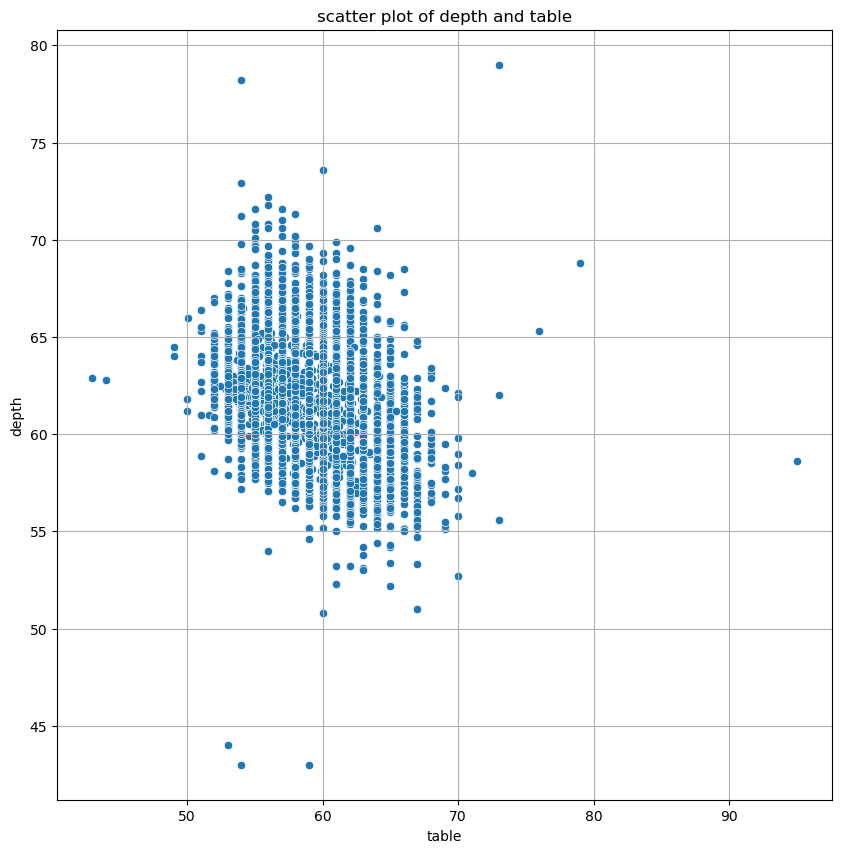

In [817]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.title("scatter plot of depth and table")
sns.scatterplot(data=df, x="table", y="depth");

**insight**
* there is a direct relationship between the table size and the depth
* most of the diamonds has table size between 50 and 70 and depth between 55 and 70

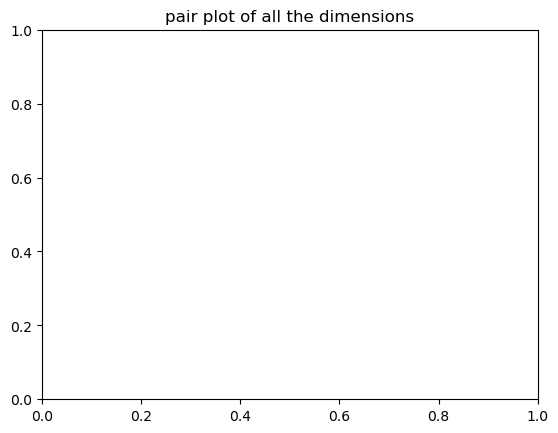

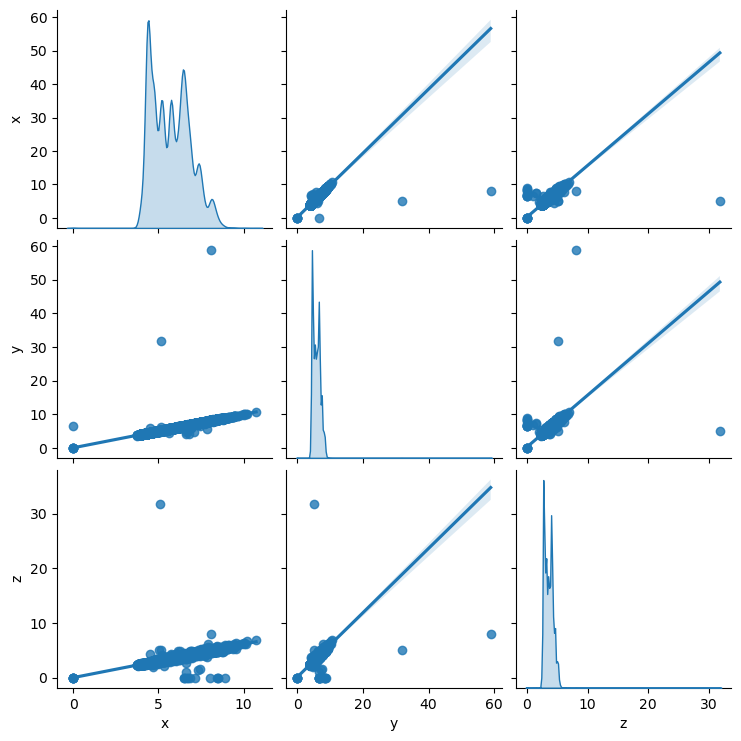

In [830]:
df_dimensions = df[["x","y","z"]]
plt.title("pair plot of all the dimensions")
sns.pairplot(df_dimensions, kind="reg", diag_kind="kde");

**insight**
* there a direct relationship between each dimension and thr other two
* all the dimentions have zero values
* all dimensions seems to have alot of outliers

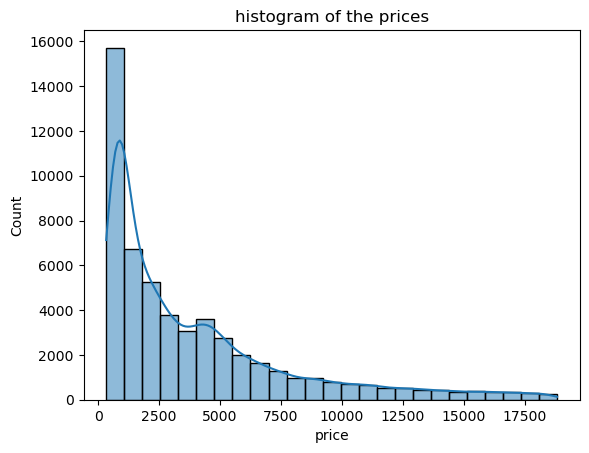

In [819]:
plt.title("histogram of the prices")
sns.histplot(df,x = "price",bins = 25, kde = True);

**insight**
* most prices are inrange between **0** and **2500**
* the figure is skewed to the right 

# Encoding the categorical data

In [820]:
order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
df['cut encoded'] = pd.Categorical(df['cut'], categories=order, ordered=True).codes + 1

In [821]:
order =["If", "Vvs1", "Vvs2", "Vs1", "Vs2", "Si1", "Si2", "I1"]
df["clarity encoded"] =pd.Categorical(df["clarity"], categories= order, ordered=True).codes + 1

In [822]:
df["color G"] = np.where(df["color"] =="G",1,0)
df["color E"] = np.where(df["color"] =="E",1,0)
df["color F"] = np.where(df["color"] =="F",1,0)
df["color H"] = np.where(df["color"] =="H",1,0)
df["color D"] = np.where(df["color"] =="D",1,0)
df["color I"] = np.where(df["color"] =="I",1,0)
df["color J"] = np.where(df["color"] =="J",1,0)


In [823]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut encoded,clarity encoded,color G,color E,color F,color H,color D,color I,color J
0,0.23,Ideal,E,Si2,61.5,55.0,326,3.95,3.98,2.43,1,7,0,1,0,0,0,0,0
1,0.21,Premium,E,Si1,59.8,61.0,326,3.89,3.84,2.31,2,6,0,1,0,0,0,0,0
2,0.23,Good,E,Vs1,56.9,65.0,327,4.05,4.07,2.31,4,4,0,1,0,0,0,0,0
3,0.29,Premium,I,Vs2,62.4,58.0,334,4.20,4.23,2.63,2,5,0,0,0,0,0,1,0
4,0.31,Good,J,Si2,63.3,58.0,335,4.34,4.35,2.75,4,7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,Si1,60.8,57.0,2757,5.75,5.76,3.50,1,6,0,0,0,0,1,0,0
53936,0.72,Good,D,Si1,63.1,55.0,2757,5.69,5.75,3.61,4,6,0,0,0,0,1,0,0
53937,0.70,Very Good,D,Si1,62.8,60.0,2757,5.66,5.68,3.56,3,6,0,0,0,0,1,0,0
53938,0.86,Premium,H,Si2,61.0,58.0,2757,6.15,6.12,3.74,2,7,0,0,0,1,0,0,0


# Scaling numerical data

we will use min max scaling for both **depth** and **table** and 'log' scaling for **price** and **carat** because they are skewed and save all of the new scaled values in new columns

In [824]:
df["table scaled"] = (df["table"] - df["table"].min()) / (df["table"].max() - df["table"].min())
df["depth scaled"] = (df["depth"] - df["depth"].min()) / (df["depth"].max() - df["depth"].min())
df["price scaled"] = np.log(df["price"])
df["carat scaled"] = np.log(df["carat"])

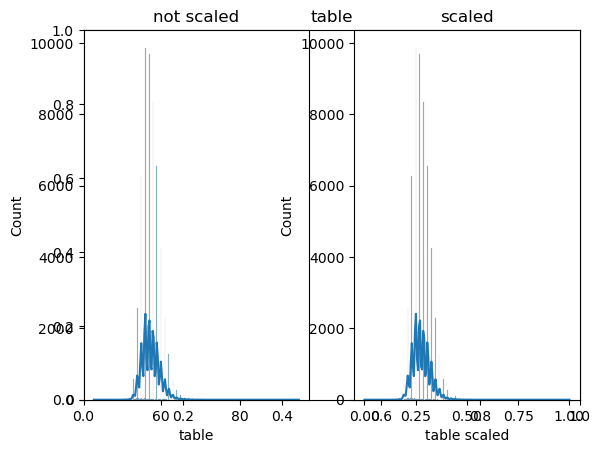

In [825]:
plt.title("table")
plt.subplot(1,2,1)
plt.title("not scaled")
sns.histplot(data = df, x = "table", kde = True);
plt.subplot(1,2,2)
plt.title("scaled")
sns.histplot(data = df, x = "table scaled", kde = True);

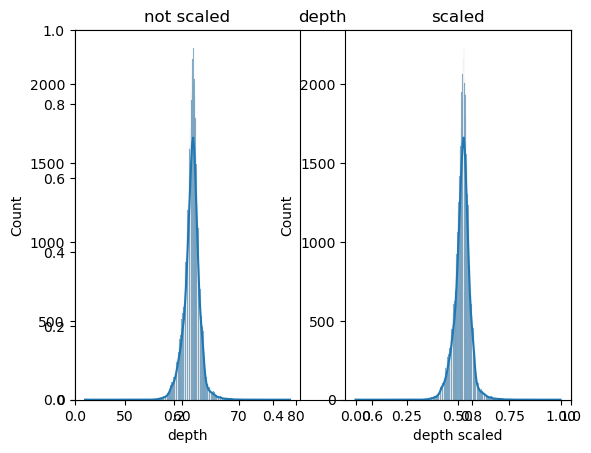

In [826]:
plt.title("depth")
plt.subplot(1,2,1)
plt.title("not scaled")
sns.histplot(data = df, x = "depth", kde = True);
plt.subplot(1,2,2)
plt.title("scaled")
sns.histplot(data = df, x = "depth scaled", kde = True);

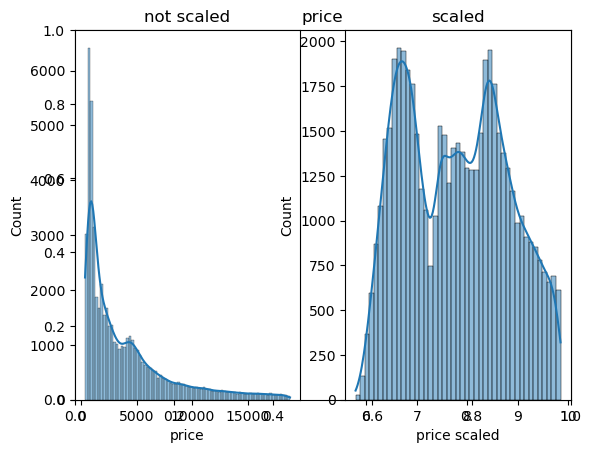

In [827]:
plt.title("price")
plt.subplot(1,2,1)
plt.title("not scaled")
sns.histplot(data = df, x = "price", kde = True);
plt.subplot(1,2,2)
plt.title("scaled")
sns.histplot(data = df, x = "price scaled", kde = True);

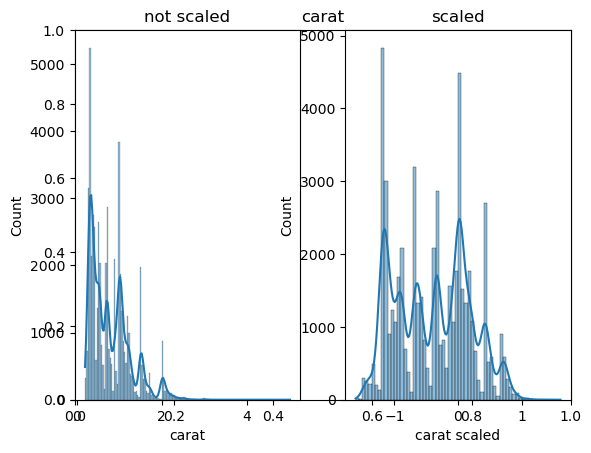

In [828]:
plt.title("carat")
plt.subplot(1,2,1)
plt.title("not scaled")
sns.histplot(data = df, x = "carat", kde = True);
plt.subplot(1,2,2)
plt.title("scaled")
sns.histplot(data = df, x = "carat scaled", kde = True);